In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("Movie analytics.csv")
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,01-01-1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11-02-1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
df.shape

(10866, 21)

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df.drop(columns=['id','imdb_id','overview','homepage'], inplace=True)

In [11]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [12]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
# filling missing values 
df['cast'].fillna('missing', inplace=True)
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing', inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing', inplace=True)

In [14]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
df['budget']=df['budget'].replace(0,np.NAN)

In [16]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
# check for duplicates
df.duplicated().sum()

1

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

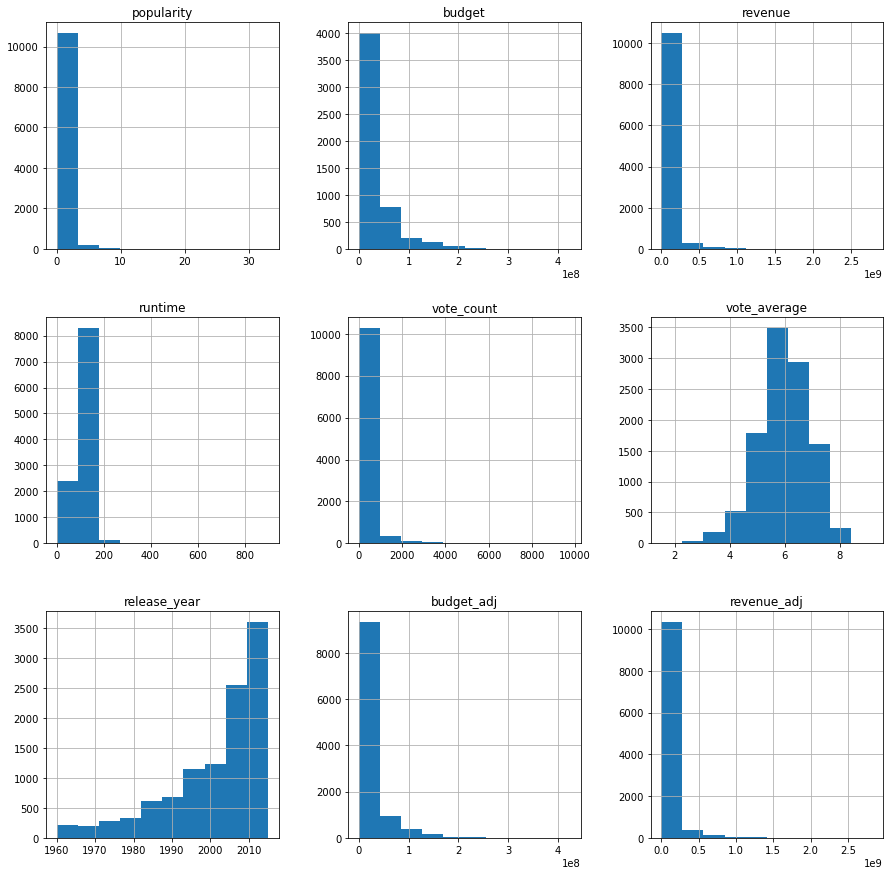

In [20]:
# visualizing each variable
df.hist(figsize=(15,15))

# Exploration with visuals


# Question 1: Budget vs Popularity

Text(0, 0.5, 'popularity')

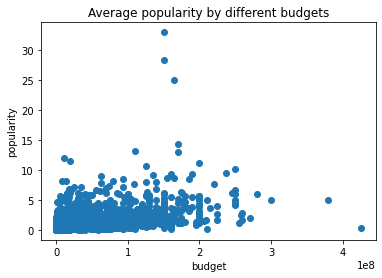

In [21]:
x = df['budget']
y = df['popularity']

plt.scatter(x,y)
plt.title("Average popularity by different budgets")
plt.xlabel('budget', fontsize=10)
plt.ylabel('popularity',fontsize=10)

A strong relationship cannot be seen between the budget and popularity from the above plot.

In [22]:
# The budget will be divided into two groups: low and high
m = df['budget'].median()
low_budget = df.query('budget < {}'.format(m))
high_budget = df.query('budget >= {}'.format(m))

In [23]:
# mean values of low and high budget values
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

In [1]:
# Creating a bar graph for above values
locations = [1,2]
heights = [mean_popularity_of_low_budget, mean_popularity_of_high_budget]
labels = ['low','high']
plt.bar(locations,heights, tick_label = labels)
plt.title('Average popularity of different budget')
plt.xlabel('Budgets')
plt.ylabel('Average popularity')

NameError: name 'mean_popularity_of_low_budget' is not defined

Conclusion: High budget movies are more likely to be popular than low budget movies by mmore than 50%.

# Question 2: Duration of the movie vs Popularity

In [25]:
# Three groups are created to divide the duartion in short, medium and large with duration as < 60 mins, 60 mins <= 120 mins, and >120 mins respectively

short = df.query('runtime < {}'.format(100))
medium = df.query('runtime < {}'.format(200))
large = df.query('runtime < {}'.format(200))

In [26]:
# mean popularity of each movie duration category
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_large = large['popularity'].mean()

Text(0, 0.5, 'Average popularity')

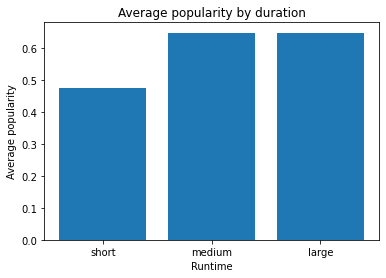

In [27]:
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_large]
labels = ['short', 'medium','large']
plt.bar(locations, heights,tick_label= labels)
plt.title('Average popularity by duration')
plt.xlabel('Runtime')
plt.ylabel('Average popularity')

Text(0, 0.5, 'popularity')

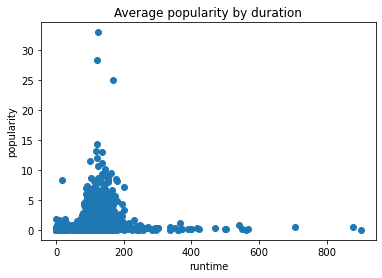

In [28]:
# relation between duration and popularity
x = df['runtime']
y = df['popularity']

plt.scatter(x,y)
plt.title('Average popularity by duration')
plt.xlabel('runtime', fontsize=10)
plt.ylabel('popularity',fontsize=10)

Conclusion: It can be deduced that the movies within the duration of 200 minutes will be more popular

# Question 3: Profit vs Popularity

In [35]:
m_popularity = df['popularity'].median()
lower_popularity = df.query('popularity < {}'.format(m_popularity))
higher_popularity = df.query('popularity < {}'.format(m_popularity))

In [36]:
# Create a new profit column
df['profit'] = df['revenue']- df['budget']
# df['profit'].head(10)

In [37]:
df.head()


,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09,1.363529e+09
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08,2.284364e+08
2,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08,1.852382e+08
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09,1.868178e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09,1.316249e+09


In [38]:
# Average popularity 
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

Text(0, 0.5, 'Average profit')

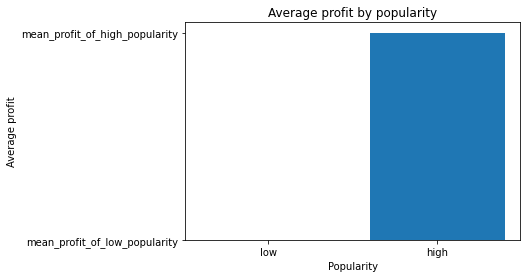

In [40]:
# Visualizing above values
locations=[1,2]
heights = ['mean_profit_of_low_popularity', 'mean_profit_of_high_popularity']
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title("Average profit by popularity")
plt.xlabel('Popularity')
plt.ylabel('Average profit')

Conclusion: Higher popularity does make higher profits

#  What are the features associated with top 10 revenue movies?


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>],
       [<AxesSubplot:title={'center':'profit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

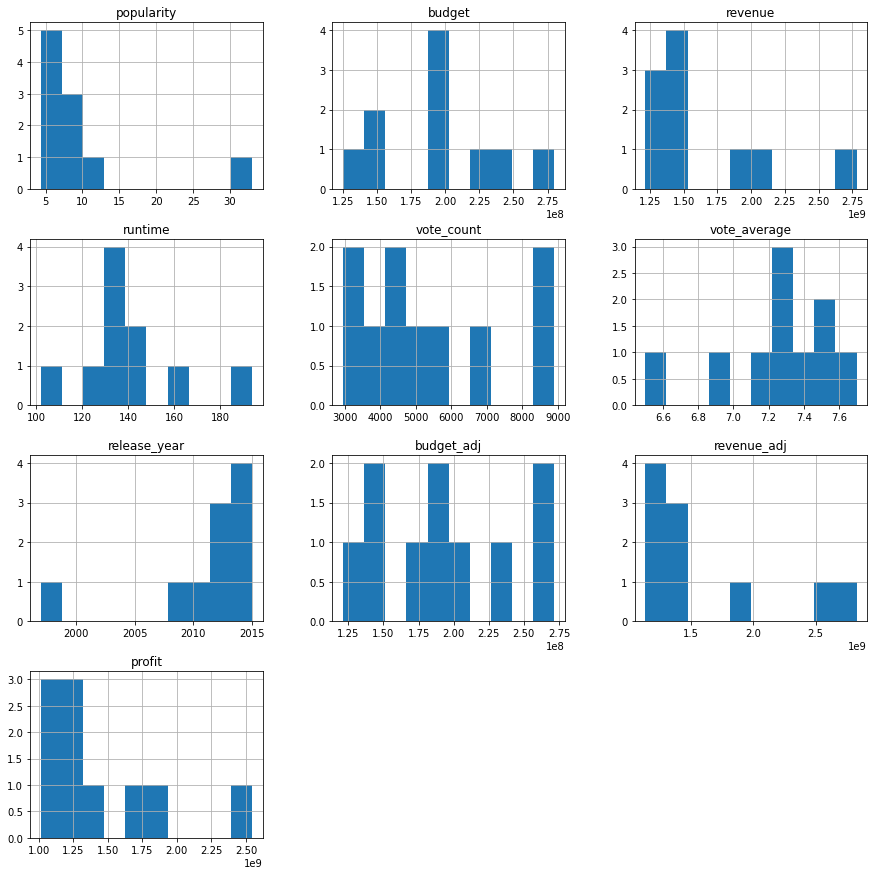

In [41]:
top10_revenue = df.nlargest(10, 'revenue')
top10_revenue.hist(figsize=(15,15))

# Which genres are most popular from year to year?


In [42]:
def extract_data(column_name):
    data = df[column_name].str.cat(sep='|')  # puts all genres in a long string
    # create pandas series and store values separately
    data = pd.Series(data.split('|'))
    # display value counts in descending order
    count = data.value_counts(ascending=False)
    return count


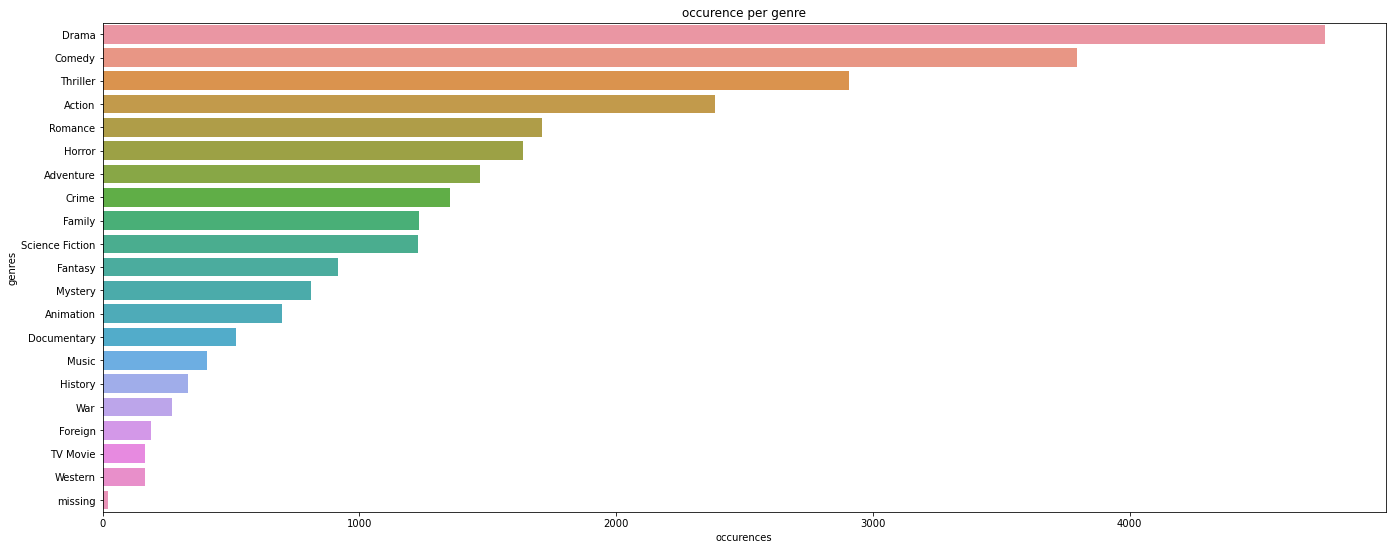

In [43]:
genre_count = extract_data('genres')

# create a separate dataframe to plot
df_genre_count = pd.DataFrame({'genres': genre_count.index, 'count':genre_count.values})

f, ax = plt.subplots(figsize=(23,9))

sns.barplot(x='count', y='genres', data = df_genre_count)

ax.set_title('occurence per genre')
ax.set_xlabel('occurences')
ax.set_ylabel('genres')
plt.show()

In [44]:
director_count = extract_data('director')
director_count

Woody Allen           46
missing               44
Clint Eastwood        34
Martin Scorsese       31
Steven Spielberg      30
                      ..
Marshall Curry         1
Paul A. Kaufman        1
Zana Briski            1
Michael Goldenberg     1
Ted Nicolaou           1
Length: 5363, dtype: int64

Text(0, 0.5, 'number of movies')

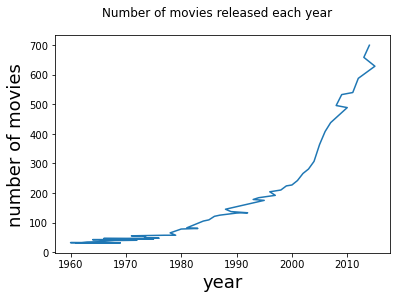

In [48]:
movie_count = df['release_year'].value_counts()
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of movies released each year')
plt.xlabel('year', fontsize=18)
plt.ylabel('number of movies', fontsize=18)

Conclusion: The top 5 genres are Drama, Comedy, Action, Horror, and Adventure

# Conclusion: 


Based on the analysis, we can conclude:

1. The quantity and range of movie gets larger.We have more choices to choose from as an audience.
2. We can not say high budget guarantees high popularity. But for movies with higher budgets do produce higher average popularity.
3. To produce a more popular movie, the runtime should be best around 150 mins; Drama, Comedy, Action, these genres would be preferable.

# Limitations: 

Apart from the factors that makes the movies popular and successful, limitations should also be considered. There are some missing data and many erroreous zeros which may affect the analysis.

1. It's hard for us to know how the vote_counts and popularity are measured.

2. For foreign movies,currency is not indicated. Inflation over the years should also be taken into consideration.